## Decision Tree model training
This notebook trains a decision tree on one of the in-built datasets that comes with the SKLearn library. This is the 'digits' data set, which is simplified version of the famous MNIST dataset. This dataset contains images of handwritten numbers 0-9. You are given the grayscale colour of each picture in the image, and the goal is to predict the number.

In [23]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
digits = datasets.load_digits() #load the digits dataset
X = digits.data #these are the raw pixel values
y = digits.target #these are the labels

Plot the first example in the dataset. Note that we are using the *digits.images* object, which contains the 2D version of the data. *digits.data* contains the same data, but it has been flattened into a 1D array.

<Figure size 640x480 with 0 Axes>

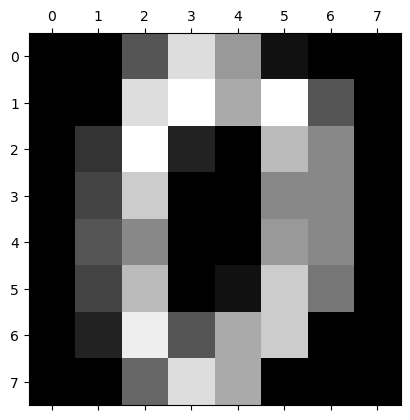

In [25]:
plt.gray()
plt.matshow(digits.images[0]) 
plt.show()

We'll now train a random forest classifier using 5-fold cross validation. The *cross_val_score* does this for us automatically, and outputs the accuracy

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.78055556 0.69722222 0.79665738 0.84401114 0.7994429 ]


The default scorer in *cross_val_score* calculates the accuracy, but we can change that as follows to give sensitivity (for example) for a specific class

In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [28]:
sensitivity = make_scorer(recall_score, pos_label=1, average='macro') #sensitivity is equivalent to recall

In [29]:
scores = cross_val_score(model, X, y, cv=5, scoring=sensitivity)

In [30]:
scores

array([0.79493994, 0.71722866, 0.78997615, 0.83771343, 0.80315101])

## ROC Analysis
We will now go through an example of ROC analysis. In the lab exercises, the outcomes are binary ({died, recovered}). The following shows how you can extended ROC analysis for a multiclass problem, as you will need to do in your assignment.

Here, we will consider how well a logistic regression classifier performs at predicting the number '0' on the digits dataset. To do this, we will convert the multiclass problem into a binary problem. We will do this in a rather simplistic way, by relabelling any number that is not '0' as '1'.

For simplicity, we will use a train/test split instead of cross validation

In [31]:
# change all of the labels that are NOT 0 to 1
y[y!=0] = 1

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Having trained the model, we now make some predictions on the test set. Note that yesterday we used the *predict* function, which output the predicted class. Now, we are using *predict_proba* which gives the output probability of the logistic regression. It returns two columns, the probability of class 0 and class 1 respectively.

In [32]:
y_pred = logreg.predict_proba(X_test)
print(y_pred)

[[4.68557171e-09 9.99999995e-01]
 [2.99384744e-06 9.99997006e-01]
 [1.27561342e-04 9.99872439e-01]
 ...
 [2.54703325e-09 9.99999997e-01]
 [7.88345829e-04 9.99211654e-01]
 [6.57262089e-09 9.99999993e-01]]


In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,0], pos_label=0)

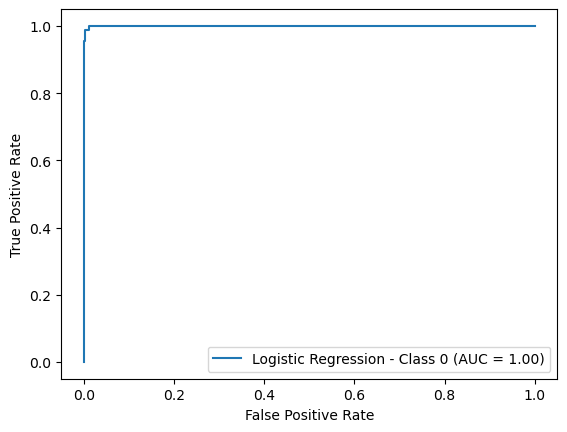

In [34]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression - Class 0')
display.plot()
plt.show()

## addendum
You may have noticed that in this example, we did not scale the data (despite my encouragement for you to do so as a matter of habit). The reason for this is just to try to reduce the amount of new programming you need to learn. Applying the scaling function inside cross-validation adds an additional set of functions to learn, as one needs to scale within each of the folds. For more information on how to do this, see https://stackoverflow.com/questions/44446501/how-to-standardize-data-with-sklearns-cross-val-score

In [ ]:
#2.2

